<a href="https://colab.research.google.com/github/abishekabi/Volcanic-Eruption-Prediction/blob/main/predict_volcanic_eruptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd 'gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions'

/content/gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions


In [3]:
# !wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19059/1581061/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1603216878&Signature=Xcz3Ni8%2F7bb7rIyQlyeyfbeASoi78143MpaVMe3kyZXi3WKfxcW7kp%2F44CQYzgoE2FfwzGR343oh5QVkHTt9xTGjHufJZRxbiJ0allxJiMFJrdZaZLZP8UwcQGl4k7ZlyF%2Bc7lAcoYNI14LjW4GEUSTOYvWyIrJqWGsBPwYCcLaGLaHP4lKxF0W7M%2FIOlyIMASugpiRIVsuCkR8fNWT3k4vyRgSldLTlfI46fkNvOFIsOl8kU%2BeRVd8yuhBrA8EmY8QRR0%2FGl9wSCfyjQe8Or4nSWs5V5svpRrzbtl5gTeMcIi8emEAktsbg8lK3%2F%2BzpIMu4map2I1aXj1wAqMPnYA%3D%3D&response-content-disposition=attachment%3B+filename%3Dpredict-volcanic-eruptions-ingv-oe.zip"
# !unzip data.zip
# from google.colab import files
# files.upload() 
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission
#!kaggle competitions download -c predict-volcanic-eruptions-ingv-oe 

In [4]:
!ls -lh 

total 9.5G
-rw------- 1 root root 9.5G Oct 17 18:06 data.zip
-rw------- 1 root root 115K Oct 28 05:31 predict-volcanic-eruptions.ipynb
-rw------- 1 root root  56K Oct 17 18:08 sample_submission.csv
drwx------ 2 root root 4.0K Oct 17 18:06 test
drwx------ 2 root root 4.0K Oct 19 15:53 train
-rw------- 1 root root  84K Oct 19 16:30 train.csv


In [5]:
import gc
import glob
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Time to Eruption is in centiseconds [ 1/100 second ]**

In [6]:
df=pd.read_csv('train.csv')
df.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


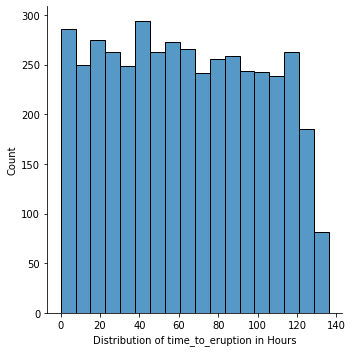

In [7]:
g = sns.displot(data=df.time_to_eruption/360000)
g.set_xlabels("Distribution of time_to_eruption in Hours")

In [8]:
df=pd.read_csv('train/1136037770.csv')
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,220.0,339.0,-336.0,364.0,NaN,492.0,-796.0,-423.0,-582.0,-40.0
1,178.0,221.0,-317.0,366.0,NaN,525.0,-754.0,-415.0,-932.0,-305.0
2,151.0,42.0,-280.0,250.0,NaN,463.0,-772.0,-229.0,-257.0,-59.0
3,162.0,-123.0,-243.0,288.0,NaN,303.0,-899.0,212.0,-295.0,38.0
4,158.0,-287.0,-300.0,372.0,NaN,169.0,-769.0,755.0,169.0,-239.0


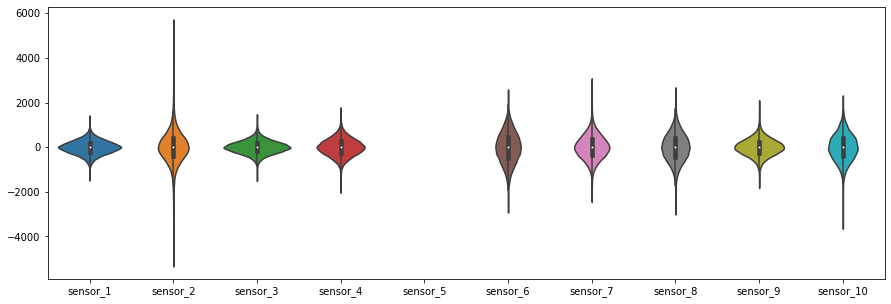

In [9]:
g = sns.violinplot(data=df)
g.figure.set_size_inches(15,5)

In [10]:
df=pd.read_csv('sample_submission.csv')
df.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [11]:
df = pd.read_csv('test/1000213997.csv')
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,180.0,NaN,295.0,-221.0,-81.0,379.0,240.0,-288.0,152.0,0.0
1,200.0,NaN,199.0,-99.0,32.0,-226.0,241.0,-114.0,36.0,0.0
2,193.0,NaN,113.0,17.0,164.0,52.0,294.0,27.0,-21.0,0.0
3,188.0,NaN,26.0,125.0,274.0,-278.0,324.0,338.0,-22.0,0.0
4,177.0,NaN,-48.0,183.0,355.0,-363.0,356.0,339.0,-32.0,0.0


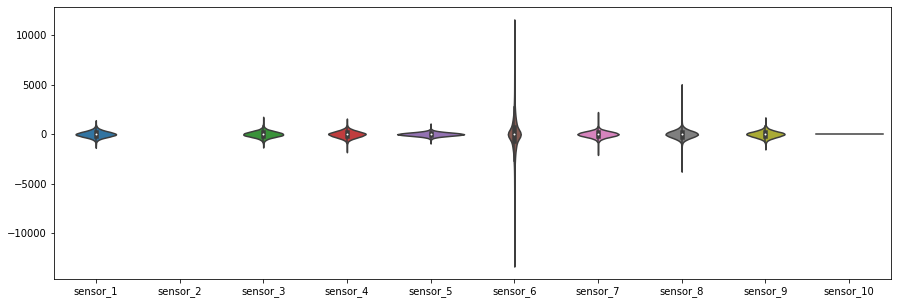

In [12]:
g = sns.violinplot(data=df)
g.figure.set_size_inches(15,5)

In [13]:
!ls

data.zip			  sample_submission.csv  train
predict-volcanic-eruptions.ipynb  test			 train.csv


# Data

In [14]:
train = pd.read_csv("train.csv")
sample_submission = pd.read_csv("sample_submission.csv")


In [15]:
train_segment_csvs = glob.glob("train/*")
test_segment_csvs = glob.glob("test/*")

In [16]:
train_segment_csvs[0:5]

['train/579307667.csv',
 'train/579908624.csv',
 'train/579683001.csv',
 'train/580262567.csv',
 'train/581069262.csv']

In [17]:
test_segment_csvs[0:5]

['test/58542575.csv',
 'test/585632599.csv',
 'test/585794453.csv',
 'test/585631329.csv',
 'test/587942731.csv']

In [18]:
print("Number of files under train/ is:", len(train_segment_csvs))
print("Number of files under test/ is:", len(test_segment_csvs))

duplicated_segment_id = [segment_id for segment_id in [ test_segment_id.split("/")[-1] for test_segment_id in test_segment_csvs]
                         if (segment_id in [ train_segment_id.split("/")[-1] for train_segment_id in train_segment_csvs])]

print("Duplicates Segment ids both in train and test are:", len(duplicated_segment_id))

Number of files under train/ is: 4431
Number of files under test/ is: 4520
Duplicates Segment ids both in train and test are: 0


In [19]:
train['time_to_eruption'].describe()

count    4.431000e+03
mean     2.284891e+07
std      1.348439e+07
min      6.250000e+03
25%      1.127016e+07
50%      2.246559e+07
75%      3.434356e+07
max      4.904609e+07
Name: time_to_eruption, dtype: float64

In [20]:
# train['time_to_eruption'].describe()[1:]
# train['time_to_eruption'].describe()[1:].values

## Load Data

In [21]:
column_names = ["sensor_1", 	"sensor_2", 	"sensor_3", 	"sensor_4", 	"sensor_5", 	"sensor_6", 	"sensor_7", 	"sensor_8", 	"sensor_9", 	"sensor_10"]
column_stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
# Apart from describe stats [ extra ]--Follow order
column_stats.extend(['sum', 'var', 'median', 'skew', 'mad', 'kurtosis'])

columns = [ i+"_"+j for i in column_names for j in column_stats]
X = pd.DataFrame(columns=columns)
y = pd.DataFrame(columns=['time_to_eruption'])
# display(X.columns)
# train_csv = pd.read_csv(train_segment_csvs[0])
for i, train_segment_csv in train[:10].iterrows():
#for train_segment_csv in train_segment_csvs[:10]:
  # train_csv = pd.read_csv(train_segment_csv)
  train_csv = pd.read_csv("train/"+ str(train_segment_csv.segment_id) + ".csv")
  y.loc[len(X), :] = train_segment_csv.time_to_eruption
  row = []
  for feature in train_csv.columns:
    # Offset by 1 column to ignore count in describe--Follow order
    row.extend(train_csv[feature].describe()[1:].values)
    # Extra stats--Follow order
    row.extend([train_csv[feature].sum(), train_csv[feature].var(), \
                train_csv[feature].median(), train_csv[feature].skew(), \
                train_csv[feature].mad(), train_csv[feature].kurtosis()] )
  X.loc[len(X), :] = row


In [22]:
display(X.head())

,sensor_1_mean,sensor_1_std,sensor_1_min,sensor_1_25%,sensor_1_50%,sensor_1_75%,sensor_1_max,sensor_1_sum,sensor_1_var,sensor_1_median,sensor_1_skew,sensor_1_mad,sensor_1_kurtosis,sensor_2_mean,sensor_2_std,sensor_2_min,sensor_2_25%,sensor_2_50%,sensor_2_75%,sensor_2_max,sensor_2_sum,sensor_2_var,sensor_2_median,sensor_2_skew,sensor_2_mad,sensor_2_kurtosis,sensor_3_mean,sensor_3_std,sensor_3_min,sensor_3_25%,sensor_3_50%,sensor_3_75%,sensor_3_max,sensor_3_sum,sensor_3_var,sensor_3_median,sensor_3_skew,sensor_3_mad,sensor_3_kurtosis,sensor_4_mean,...,sensor_7_kurtosis,sensor_8_mean,sensor_8_std,sensor_8_min,sensor_8_25%,sensor_8_50%,sensor_8_75%,sensor_8_max,sensor_8_sum,sensor_8_var,sensor_8_median,sensor_8_skew,sensor_8_mad,sensor_8_kurtosis,sensor_9_mean,sensor_9_std,sensor_9_min,sensor_9_25%,sensor_9_50%,sensor_9_75%,sensor_9_max,sensor_9_sum,sensor_9_var,sensor_9_median,sensor_9_skew,sensor_9_mad,sensor_9_kurtosis,sensor_10_mean,sensor_10_std,sensor_10_min,sensor_10_25%,sensor_10_50%,sensor_10_75%,sensor_10_max,sensor_10_sum,sensor_10_var,sensor_10_median,sensor_10_skew,sensor_10_mad,sensor_10_kurtosis
0,-1.61032,303.096,-1421,-199,0,199,1353,-96621,91867.2,0,-0.0574943,238.836,0.247736,4.61382,678.331,-5199,-391,0,403,5572,276834,460133,0,-0.00312127,508.512,2.51287,3.55972,290.873,-1453,-184,0,187,1413,213587,84606.8,0,0.071352,226.776,0.590296,2.01998,...,0.194853,1.26836,620.95,-2878,-423,0,426,2544,76103,385579,0,-0.00726325,497.884,-0.0607656,1.46504,372.387,-1747,-242,0,245,2021,87904,138672,0,0.0142488,293.588,0.285442,2.59944,596.866,-3527,-406,0,410,2187,155969,356249,0,-0.0484425,477.586,0.102101
1,1.42613,438.361,-2005,-265,0,270,2197,85569,192160,0,-0.00118865,334.894,1.17762,2.48444,661.163,-4267,-381,0,381,5111,149069,437137,0,0.0330188,494.523,2.02871,-2.79427,362.2,-2094,-224,0,221,1723,-167659,131189,0,-0.103437,277.263,1.27012,-1.70057,...,3.04902,-1.08683,364.99,-1716,-236,0,242,1476,-65211,133218,0,-0.151708,286.782,0.478144,3.17923,407.418,-2615,-246,0,255,2189,188411,165990,0,-0.0427687,312.015,1.33697,19.8955,932.7,-4591,-547,0,565,5319,1.19375e+06,869929,0,0.20252,707.193,1.60799
2,2.50459,241.575,-1115,-157,0,157,1148,150278,58358.7,0,0.0716324,189.199,0.567813,5.44971,831.469,-6147,-455,0,467,7587,326988,691341,0,0.14301,602.617,4.84009,-1.58854,217.987,-1207,-136,0,137,1159,-95314,47518.4,0,-0.112455,168.381,1.03366,-1.15083,...,0.371039,-4.11161,350.322,-1293,-238,0,238,1202,-246701,122726,0,-0.0999654,280.625,-0.106176,-1.83334,261.36,-1542,-161,0,159,1778,-110002,68309.2,0,-0.0490751,200.263,1.18124,0.968101,500.545,-2798,-323,0,321,2522,58087,250545,0,0.0071924,391.106,0.615849
3,2.1658,221.968,-1025,-137,0,140,1254,129950,49269.7,0,0.123639,171.286,1.07966,-0.373377,425.19,-2828,-253,0,252,2453,-22403,180786,0,-0.0134155,321.053,1.77673,-2.69899,194.087,-847,-127,0,123,1345,-161942,37669.8,0,0.0112599,151.967,0.667343,-1.31686,...,0.954526,-0.175314,321.893,-1457,-214,0,214,1542,-10519,103615,0,0.00960452,255.043,0.193626,-3.51092,237.985,-1574,-154,0,150,1340,-201797,56636.9,0,-0.0826214,185.815,0.658955,8.38144,523.45,-2911,-323,0,326,3614,502895,274000,0,0.229183,402.646,1.40932
4,0.0738154,261.696,-1190,-171,0,170,1114,4429,68484.8,0,0.00659414,205.913,0.274037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.99888,227.924,-1184,-149,0,152,1176,119935,51949.2,0,0.0596713,180.252,0.288693,0.245079,...,-0.201405,-1.73032,412.606,-1618,-284,0,282,1439,-103821,170244,0,-0.0323234,330.788,-0.0765472,1.62291,325.089,-7252,-166,0,168,7725,97376,105683,0,-0.143465,214.755,61.5902,-3.74047,562.748,-2611,-362,0,361,3274,-224432,316686,0,-0.0141603,440.6,0.483804


In [23]:
y

,time_to_eruption
0,12262005
1,32739612
2,14965999
3,26469720
4,31072429
5,22264866
6,34952168
7,9504818
8,11719563
9,11629084


### Cleanup NaN

In [24]:
# Try Different Methods like kNN
X = X.fillna(0)

## Split Data to train & test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Train 

In [26]:
reg = LinearRegression().fit(X_train, y_train)
#reg.score(X, y)

#Test

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
y_pred = reg.predict(X_test)

In [29]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-3.88775920e-05  3.90372017e-03 -2.51538324e-02 -2.30070213e-03
   0.00000000e+00  1.93931507e-03  5.11703825e-03 -2.33269440e+00
  -2.23143109e+00  0.00000000e+00  8.56493464e-06  2.89891915e-03
   1.39010714e-05 -1.30061264e-04 -4.81261705e-02  6.24241049e-01
   2.64221104e-02  0.00000000e+00 -2.68053608e-02 -4.08388896e-01
  -7.80380588e+00 -1.81391040e+01  0.00000000e+00  1.06871845e-05
  -3.50928286e-02 -5.80241223e-04  3.83513651e-04  2.02356585e-03
  -3.84272344e-02 -7.69854765e-04  0.00000000e+00  1.24627172e-03
   6.35893200e-02  2.30112026e+01 -2.50567033e+00  0.00000000e+00
   1.53055295e-05  1.37556142e-03  6.12590759e-05  6.79454056e-05
   8.07796518e-03 -5.43388072e-02 -5.51005215e-03  0.00000000e+00
   4.87778492e-03  5.08448944e-02  4.07679228e+00  1.83811274e-01
   0.00000000e+00  4.41738464e-06  6.29022413e-03 -2.90883872e-05
  -1.74356489e-04  3.78422371e-03  4.50881595e-03 -2.90467029e-03
   0.00000000e+00  2.69234432e-03 -3.19304858e-02 -1.0461563

In [30]:
print(y_pred, y_test)

[[ 8849250.38643085]
 [ 5091649.44496022]
 [16851408.07973101]
 [22060538.79901684]]   time_to_eruption
9         11629084
0         12262005
6         34952168
1         32739612


In [31]:
print(X_train.shape, y_train.shape)

(6, 130) (6, 1)


In [32]:
# # Plot outputs
# plt.scatter(X_train, y_train,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [33]:
# train_csv = pd.read_csv(train_segment_csvs[0])
# display(train_csv.sensor_1.describe())
# for i, row in train[:2].iterrows():
#   print("Segment ID: %d \t Time to Eruption: %d" %(row.segment_id, row.time_to_eruption) )
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   #sensor_data = sensor_data.fillna(0)
#   #sensor_data = sensor_data.dropna(axis=1)
#   print(sensor_data.isna().sum())
#   with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sensor_data.describe())
#   print(sensor_data.info())
#   print("--"*30)
# sensor_data.describe().unstack()
# def calculate_stats(sensor_row):
#   X = pd.DataFrame()
#   for row in sensor_row:
#     out = sensor_row[row].describe().values
#     print(out) 
          
# # display(train_csv.sensor_1.describe().values)
# #   print(sensor_row.describe())
#   #X = pd.DataFrame()
#   # sensor_row.mean()
#   # input_data.sum()
#   # X.loc[ts, f'{sensor_id}_mean']      = signal.mean()
#   # X.loc[ts, f'{sensor_id}_std']       = signal.std()
#   # X.loc[ts, f'{sensor_id}_var']       = signal.var() 
#   # X.loc[ts, f'{sensor_id}_max']       = signal.max()
#   # X.loc[ts, f'{sensor_id}_min']       = signal.min()

# # def basic_statistics(, sensor_id, s):
# #     """Computes basic statistics for the training feature set.
    
# #     Args:
# #         t_X (pandas.DataFrame): The feature set being built.
# #         x (pandas.Series): The signal values.
# #         s (int): The integer number of the segment.
# #         postfix (str): The postfix string value.
# #     Return:
# #         t_X (pandas.DataFrame): The feature set being built.
# #     """
# #     X = pd.DataFrame()
# #     X.loc[sensor_num, f'{sensor_id}_mean']      = signal.mean()
# #     X.loc[sensor_num, f'{sensor_id}_std']       = signal.std()
# #     X.loc[sensor_num, f'{sensor_id}_var']       = signal.var() 
# #     X.loc[sensor_num, f'{sensor_id}_max']       = signal.max()
# #     X.loc[sensor_num, f'{sensor_id}_min']       = signal.min()

# #     X.loc[s, f'{sensor}_sum{postfix}']       = x.sum()
# #     t_X.loc[s, f'{sensor}_mean{postfix}']      = x.mean()
# #     t_X.loc[s, f'{sensor}_std{postfix}']       = x.std()
# #     t_X.loc[s, f'{sensor}_var{postfix}']       = x.var() 
# #     t_X.loc[s, f'{sensor}_max{postfix}']       = x.max()
# #     t_X.loc[s, f'{sensor}_min{postfix}']       = x.min()
# #     t_X.loc[s, f'{sensor}_median{postfix}']    = x.median()
# #     t_X.loc[s, f'{sensor}_skew{postfix}']      = x.skew()
# #     t_X.loc[s, f'{sensor}_mad{postfix}']       = x.mad()
# #     t_X.loc[s, f'{sensor}_kurtosis{postfix}']  = x.kurtosis()

# #     return t_X
# for i, row in train[:1].iterrows():
#   print("Segment ID: %d \t Time to Eruption: %d" %(row.segment_id, row.time_to_eruption) )
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   print(calculate_stats(sensor_data))
#   #sensor_data = sensor_data.fillna(0)
#   #sensor_data = sensor_data.dropna(axis=1)
#   # print(sensor_data.isna().sum())
#   # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   #   print(sensor_data.describe())
#   # print(sensor_data.info())
#   print("--"*30)
# train
# # train_379022420 = pd.read_csv("train/379022420.csv")
# # train_1002275321 = pd.read_csv("train/1002275321.csv")
# train.head()
# train.info()

# train_final = pd.DataFrame(columns={'segment_id', 'time_to_eruption', 'sensor_1', 'sensor_2', 'sensor_3',
#        'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
#        'sensor_10'})
# for i, row in train[0:20].iterrows():
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   sensor_data['segment_id'] = row.segment_id
#   train1 = train.merge(sensor_data, on='segment_id')
#   # train_1_describe = pd.DataFrame(train1.describe()).reset_index()
#   # train_1_describe['segment_id'] = row.segment_id
#   train_final = pd.concat([train_final, train1], axis=0)
# train_final = train_final.reset_index(drop=True)
# train_final.groupby(['segment_id', 'time_to_eruption']).mean()
# train_final.isna().sum()

In [34]:
for train_segment_csv in train_segment_csvs[0:1]:
  train_csv = pd.read_csv(train_segment_csv)
  display(train_csv.sensor_1.describe().keys())

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')